In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from sklearn.ensemble import RandomForestClassifier as RFC

In [2]:
# read in data
train = pd.read_csv('train.csv',)
test = pd.read_csv('test.csv')

In [3]:
print train.head(5)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


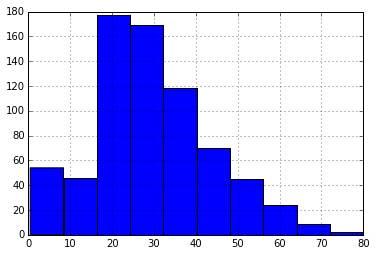

In [4]:
train.Age.hist()

In [5]:
# include Age, sibl, fare into randomforest model
train_features = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

train_features.loc[train_features.Sex == 'male', 'Sex'] = 0
train_features.loc[train_features.Sex == 'female', 'Sex'] = 1

train_features.loc[train_features.Embarked == 'C', 'Embarked'] = 1
train_features.loc[train_features.Embarked == 'Q', 'Embarked'] = 2
train_features.loc[train_features.Embarked == 'S', 'Embarked'] = 3
train_features.loc[train_features.Embarked.isnull(), 'Embarked'] = 4

while any(train_features.Age.isnull()):
    train_features.loc[train_features.Age.isnull(), 'Age'] = train_features.Age.median()

/Users/shunyong/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:407: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [12]:
# RBC training
rfc = RFC(n_estimators = 100)
rfc.fit(train_features, train['Survived'])

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)

In [13]:
test_features = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

test_features.loc[test_features.Sex == 'male', 'Sex'] = 0
test_features.loc[test_features.Sex == 'female', 'Sex'] = 1

test_features.loc[test_features.Embarked == 'C', 'Embarked'] = 1
test_features.loc[test_features.Embarked == 'Q', 'Embarked'] = 2
test_features.loc[test_features.Embarked == 'S', 'Embarked'] = 3
test_features.loc[test_features.Embarked.isnull(), 'Embarked'] = 4

In [14]:
while any(test_features.Age.isnull()):
    test_features.loc[test_features.Age.isnull(), 'Age'] = test_features.Age.median()

In [15]:
while any(test_features.Fare.isnull()):
    test_features.loc[test_features.Fare.isnull(), 'Fare'] = test_features.Fare.median()

In [16]:
1 + 1

2

In [18]:
test_preds = rfc.predict(test_features)
output = pd.DataFrame( data = {"PassengerId":test["PassengerId"], "Survived":test_preds} )
output.to_csv( "myRandomForest4.csv", index=False, quoting=3 )